# Data Exploration

In [45]:
import pandas as pd
import numpy as np

df = pd.read_csv("data.csv")

## Display Head

In [46]:
df.head(10)

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
5,5,alfa-romeo,Alfa Romeo Spider,red,04/1996,1996,7900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,47307.0,2.0 16V Twin Spark
6,6,alfa-romeo,Alfa Romeo 145,red,12/1996,1996,3500,110,150,Manual,Petrol,"8,8 l/100 km",210 g/km,230000.0,Quadrifoglio
7,7,alfa-romeo,Alfa Romeo 164,black,07/1996,1996,5500,132,179,Manual,Petrol,"13,4 l/100 km",320 g/km,168000.0,(3.0) V6 Super
8,8,alfa-romeo,Alfa Romeo Spider,black,07/1996,1996,8990,141,192,Manual,Petrol,11 l/100 km,265 g/km,168600.0,|HU:neu|Klimaanlage|Youngtimer|
9,9,alfa-romeo,Alfa Romeo Spider,black,01/1996,1996,6976,110,150,Manual,Petrol,"9,2 l/100 km",220 g/km,99000.0,2.0 T.Spark L *Klima *2.Hand *Zahnriemen


## Description of Data

In [47]:
print(df.describe())

          Unnamed: 0  mileage_in_km
count  251079.000000   2.509270e+05
mean   125539.000000   8.534002e+04
std     72480.408456   7.871706e+04
min         0.000000   0.000000e+00
25%     62769.500000   2.490400e+04
50%    125539.000000   6.750000e+04
75%    188308.500000   1.265000e+05
max    251078.000000   3.800000e+06


## Data Info

In [48]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

## Check for Nulls & Duplicates

### Check for Nulls

In [49]:
print(df.isnull().sum())


Unnamed: 0                      0
brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                   0
power_kw                      134
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
fuel_consumption_g_km           0
mileage_in_km                 152
offer_description               1
dtype: int64


### Check for Duplicates

In [50]:
print(df.duplicated().sum())

0


# Data Cleaning & Visualization

## Research Question 1

#### Removing Wrong Data Type

In [51]:
import pandas as pd

# 1) Remove any string from those attributes and leave the float

df["fuel_consumption_l_100km"] = pd.to_numeric(
    df["fuel_consumption_l_100km"].replace(regex=True, to_replace=r"[^0-9.]", value=""),
    errors="coerce",
)
df["power_kw"] = pd.to_numeric(
    df["power_kw"].replace(regex=True, to_replace=r"[^0-9.]", value=""), errors="coerce"
)

# 2) If there is only a string, replace with null

df["fuel_consumption_l_100km"] = pd.to_numeric(
    df["fuel_consumption_l_100km"], errors="coerce"
)
df["power_kw"] = pd.to_numeric(df["power_kw"], errors="coerce")

# 3) If there is a negative value, replace with 0

df["fuel_consumption_l_100km"] = df["fuel_consumption_l_100km"].apply(
    lambda x: max(x, 0) if pd.notnull(x) else x
)
df["power_kw"] = df["power_kw"].apply(lambda x: max(x, 0) if pd.notnull(x) else x)



#### Assign Data Types

In [52]:
#assign data types to columns
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].astype('float64')
df['power_kw'] = df['power_kw'].astype('float64')
df['transmission_type'] = df['transmission_type'].astype('category')

In [53]:
df.isnull().sum()

Unnamed: 0                      0
brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                   0
power_kw                      155
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26922
fuel_consumption_g_km           0
mileage_in_km                 152
offer_description               1
dtype: int64

##### Numerical Imputer

In [54]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

columns_to_impute = ["fuel_consumption_l_100km", "power_kw"]

# Create IterativeImputer
numerical_imputer = IterativeImputer(max_iter=10, random_state=0)
df[columns_to_impute] = numerical_imputer.fit_transform(df[columns_to_impute])

#Remove Unknown values from the transmission_type column
df = df[df.transmission_type != "Unknown"]

In [55]:
df.isnull().sum()

Unnamed: 0                    0
brand                         0
model                         0
color                       166
registration_date             4
year                          0
price_in_euro                 0
power_kw                      0
power_ps                    127
transmission_type             0
fuel_type                     0
fuel_consumption_l_100km      0
fuel_consumption_g_km         0
mileage_in_km               151
offer_description             1
dtype: int64

##### Handling Outliers

In [56]:
import pandas as pd
from scipy.stats import zscore

df["power_kw_zscore"] = zscore(df["power_kw"])

# Set a threshold for Z-scores
zscore_threshold = 3
filtered_df = df[abs(df["power_kw_zscore"]) <= zscore_threshold]

# Discretize the filtered power_kw column
num_bins = 10
filtered_df["power_kw_discretized"] = pd.cut(
    filtered_df["power_kw"], bins=num_bins, labels=False
)

C:\Users\Yahia\AppData\Local\Temp\ipykernel_10280\3547631211.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["power_kw_discretized"] = pd.cut(


##### Visualization

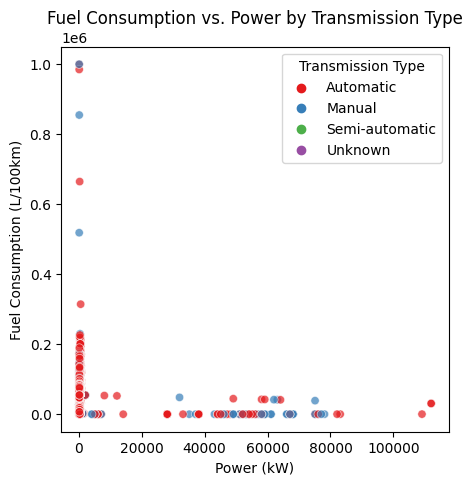

C:\Users\Yahia\AppData\Local\Temp\ipykernel_10280\529829859.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


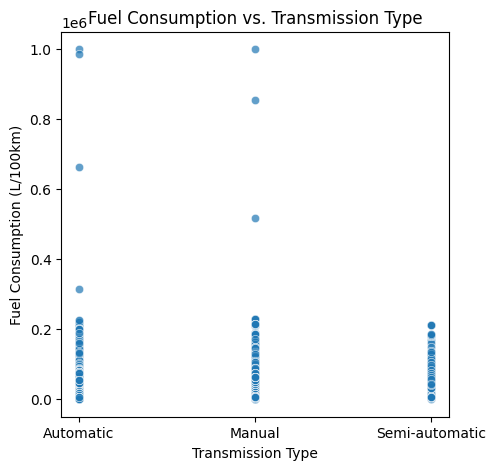

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot between power_kw and fuel_consumption_l_100km
plt.figure(figsize=(5,5))
sns.scatterplot(
    data=df,
    x="power_kw",
    y="fuel_consumption_l_100km",
    hue="transmission_type",
    palette="Set1",
    alpha=0.7,
)
plt.xlabel("Power (kW)")
plt.ylabel("Fuel Consumption (L/100km)")
plt.title("Fuel Consumption vs. Power by Transmission Type")
plt.legend(title="Transmission Type")
plt.show()

# Scatter plot between transmission_type and fuel_consumption_l_100km
plt.figure(figsize=(5,5))
sns.scatterplot(
    data=df,
    x="transmission_type",
    y="fuel_consumption_l_100km",
    palette="Set1",
    alpha=0.7,
)
plt.xlabel("Transmission Type")
plt.ylabel("Fuel Consumption (L/100km)")
plt.title("Fuel Consumption vs. Transmission Type")
plt.show()


## Research Question 1:
 #### How does the fuel efficiency (fuel consumption in liters per 100 kilometers) of German used cars in 2023 vary based on their transmission type and power (measured in kilowatts)?


#### Power and Fuel Consumption Correlation:
##### Fuel usage and power seem to be negatively correlated in general. Powerful cars might have more fuel-efficient engines, which would reduce fuel usage. The engine's efficiency and design have a big impact on this relationship.


##### Relationship between Fuel Consumption and Gearbox Type:
##### When opposed to manual gearboxes, automatic transmissions are frequently linked to somewhat higher fuel consumption. In some driving situations, automatic transmissions could not be as fuel-efficient because they might need more power to function. Drivers with manual transmissions have more control over changing gears, which may result in increased fuel economy.



## Research question 2

#### Removing Wrong Data Type

In [58]:
df["price_in_euro"] = pd.to_numeric(
    df["price_in_euro"].replace(regex=True, to_replace=r"[^0-9.]", value=""),
    errors="coerce",
)
df["price_in_euro"] = pd.to_numeric(df["price_in_euro"], errors="coerce")
df["price_in_euro"] = df["price_in_euro"].apply(
    lambda x: max(x, 0) if pd.notnull(x) else x
)

In [59]:
df.isnull().sum()

Unnamed: 0                    0
brand                         0
model                         0
color                       166
registration_date             4
year                          0
price_in_euro               165
power_kw                      0
power_ps                    127
transmission_type             0
fuel_type                     0
fuel_consumption_l_100km      0
fuel_consumption_g_km         0
mileage_in_km               151
offer_description             1
power_kw_zscore               0
dtype: int64

#### Handling Missing Values

In [60]:
columns_to_impute2 = ['price_in_euro']

df[columns_to_impute2] = numerical_imputer.fit_transform(df[columns_to_impute2])


In [61]:
df.isnull().sum()

Unnamed: 0                    0
brand                         0
model                         0
color                       166
registration_date             4
year                          0
price_in_euro                 0
power_kw                      0
power_ps                    127
transmission_type             0
fuel_type                     0
fuel_consumption_l_100km      0
fuel_consumption_g_km         0
mileage_in_km               151
offer_description             1
power_kw_zscore               0
dtype: int64

##### Fuel Column Adjustment

In [62]:
# remove any non string values from fuel_type column
df["fuel_type"] = df["fuel_type"].replace(regex=True, to_replace=r"[^a-zA-Z]", value="")
# Only include Petrol , Diesel ,Hybrid and Electric
df = df[df.fuel_type.isin(["Petrol", "Diesel", "Hybrid", "Electric"])]

##### Brand Column Adjustment

In [63]:
# 5 most used car brands
top_5_brands = df["brand"].value_counts().head(5).index.tolist()

# use them only for the top 5
df = df[df.brand.isin(top_5_brands)]

##### Handling Outliers & Discretization

In [64]:
df["price_in_euro_zscore"] = zscore(df["price_in_euro"])

filtered_df = df[abs(df["price_in_euro_zscore"]) <= zscore_threshold]

# Calculate mean and standard deviation of price_in_euro
mean_price = filtered_df["price_in_euro"].mean()
std_price = filtered_df["price_in_euro"].std()

# Define custom price ranges using mean and standard deviation
price_ranges = [
    mean_price - 2 * std_price,
    mean_price - std_price,
    mean_price,
    mean_price + std_price,
    mean_price + 2 * std_price,
    float("inf"),
]
labels = list(range(len(price_ranges) - 1))

# Discretize the filtered price_in_euro column with custom ranges
filtered_df["price_in_euro_discretized"] = pd.cut(
    filtered_df["price_in_euro"], bins=price_ranges, labels=labels
)

C:\Users\Yahia\AppData\Local\Temp\ipykernel_10280\4180917818.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["price_in_euro_discretized"] = pd.cut(


##### Visualization

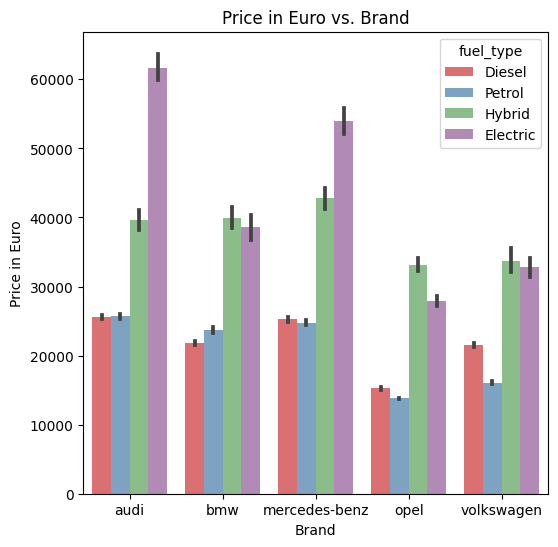

In [65]:
# Bar Chart plot between price_in_euro and brand
plt.figure(figsize=(6, 6))
sns.barplot(
    data=filtered_df,
    x="brand",
    y="price_in_euro",
    hue="fuel_type",
    palette="Set1",
    alpha=0.7,
)
plt.xlabel("Brand")
plt.ylabel("Price in Euro")
plt.title("Price in Euro vs. Brand")
plt.show()

## Research Question 2:
#### Is there a significant difference in the prices of German used cars in 2023 across various brands and fuel types ?


#### There is a clear relation ship between price and brand as shown ferrari , lamborghini , mercedes benz , porsche are the most expensive cars


##### There is also a clear relationship between price and fuel type as shown petrol and hybrid cars are the most expensive cars , then comes diesel and electric cars

